# Intro
I want to measure cultural importation and impact using Yelp's dataset on restaurants as a proxy for influence from another culture. This dataset from yelp has only restaurants from the US and Canada, but we can use that to determine cultural impact on this area.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
sns.set()

In [2]:
restaurantdf=pd.read_csv('yelp_dataset/restaurantCleanCategories.csv',encoding = "utf-8-sig")

In [3]:
#split the date to be separate items in an array isntead of a string of items
restauranttest=restaurantdf.date.str.split(', ',n=-1,expand=False)
restaurantdf.insert(1,'checkin',restauranttest,True)
del restaurantdf['date']

In [4]:
#CSV with just business ID and category dummy variable information. 
categories=pd.read_csv('yelp_dataset/categories.csv',encoding = "utf-8-sig")

In [5]:
#get means for all the categories to get an average
cat_mean=np.mean(categories.drop(columns=['business_id']))

In [6]:
cat_mean_sorted=cat_mean.sort_values(ascending=False)

# Preliminary Data Visualization

Text(0, 0.5, 'percentage')

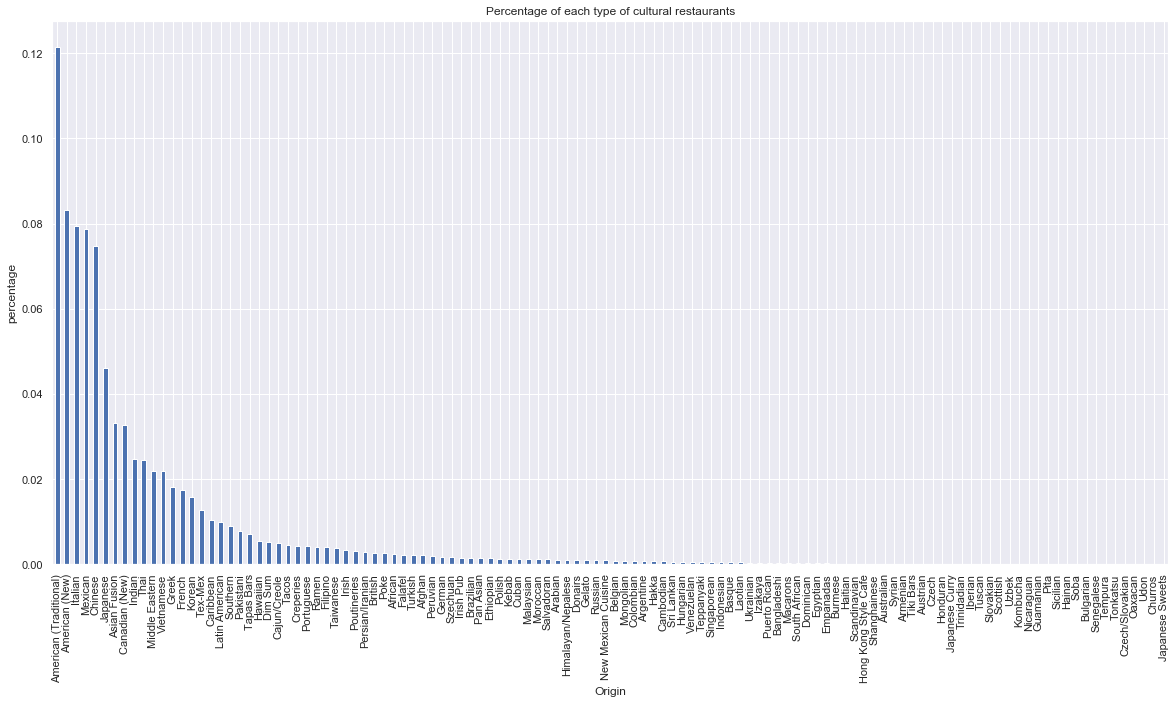

In [9]:
_=cat_mean_sorted.plot(kind='bar',
                figsize=(20, 10),
                title='Percentage of each type of cultural restaurants')
#_.set_xticklabels(xlabels,rotation=45)
_.set_xlabel("Origin")
_.set_ylabel("percentage")

From the chart above American food is the highest percentage which should be no surprise as these are restaurants mainly in Canada and America. Not all restaurants are tagged which is fine, many restaurants such as a deli would not be catering a specific cultural designation. Though Japanese is a high drop off after chinese, it is split into 9 different categories.

Text(0, 0.5, 'Count')

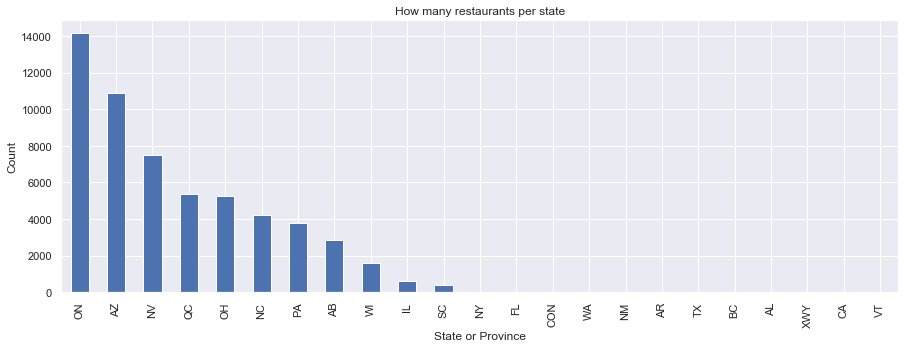

In [10]:
_=restaurantdf.state.value_counts().plot(kind='bar',
                figsize=(15, 5),
                title='How many restaurants per state')
_.set_xlabel("State or Province")
_.set_ylabel("Count")

In [11]:
restaurantdf.loc[restaurantdf['state']=='AZ'].city.value_counts()

Phoenix                 3787
Scottsdale              1491
Mesa                    1122
Tempe                    988
Chandler                 812
Glendale                 688
Gilbert                  557
Peoria                   359
Surprise                 217
Goodyear                 175
Avondale                 169
Cave Creek                87
Fountain Hills            81
Litchfield Park           45
Sun City                  45
Tolleson                  34
Laveen                    33
Carefree                  30
Paradise Valley           26
El Mirage                 25
Queen Creek               20
Buckeye                   14
Sun City West             13
Sun Lakes                 11
Youngtown                  9
Guadalupe                  6
Anthem                     6
Higley                     5
PHOENIX                    4
Ahwatukee                  4
Laveen Village             4
Apache Junction            4
Fort McDowell              4
Pheonix                    2
Fort Mcdowell 

In [16]:
#Information provided by the US Census bureau (https://www.census.gov/quickfacts/fact/table/phoenixcityarizona,AZ/PST045219)
AZdf=pd.read_csv('yelp_dataset/AZcensus.csv',encoding = "utf-8-sig")
AZdf

,Fact,"Phoenix city, Arizona",Arizona
0,"Population estimates, July 1, 2019, (V2019)",NaN,"7,278,717"
1,"Population estimates, July 1, 2018, (V2018)","1,660,272","7,171,646"
2,"Population estimates base, April 1, 2010, (V2...",NaN,"6,392,288"
3,"Population estimates base, April 1, 2010, (V2...","1,446,914","6,392,288"
4,"Population, percent change - April 1, 2010 (es...",NaN,13.90%
5,"Population, percent change - April 1, 2010 (es...",14.70%,12.20%
6,"Population, Census, April 1, 2010","1,445,632","6,392,017"
7,"Persons under 5 years, percent",7.40%,6.10%
8,"Persons under 18 years, percent",26.50%,22.90%
9,"Persons 65 years and over, percent",10.30%,17.50%


In [19]:
restaurantdf.loc[restaurantdf['city']=='Phoenix'].count()[0]

3787

Looking at demographic data from the US Census to see how it compares to Phoenix is the biggest city in Arizona and Arizona is the biggest US city in the dataset we are given. About 438 people per restaurant. The US census as well does not define people by national origin but by race(e.g. Hispanic vs Mexican or Peruvian), which will be an issue for categorization later on as it is not as descriptive, but it can still be used to determine foreign cultural influence to a lesser degree. Restaurants not tagged as american or canadian food would be considered foreign, I will then analyze how much foreign influence there is on domestic cities based on the amount and types of restaunts.

# Relationships between City Size and Cultural Influence

In [7]:
restaurantdf=restaurantdf.fillna(0)
ethnic=restaurantdf.drop(columns=['business_id','checkin','name','city','state'])

In [8]:
def check_if_foreign_food(row):
    for i in list(row.keys()):
        if row[i] > 0: 
            return True
    return False

foreign=[]
for i, row in ethnic.iterrows():
    foreign.append(check_if_foreign_food(row))
restaurantdf['foreign']=foreign

#ethnic['foreign'] = ethnic.apply(lambda x: check_if_foreign_food(x))
#ethnic.head(10)

In [9]:
cityCount=restaurantdf.city.value_counts()

In [10]:
cityCountForeign=restaurantdf.loc[restaurantdf['foreign']==True].city.value_counts()

In [11]:
citiesdf = pd.DataFrame()
citiesdf['restaurants']=cityCount

In [12]:
citiesdf=citiesdf.join(cityCountForeign)

In [13]:
citiesdf.columns=['restaurants','foreignRestaurants']

In [14]:
citiesdf['percentageForeign']=citiesdf.apply(lambda row: row['foreignRestaurants']/row['restaurants'],axis=1)
citiesdf=citiesdf.fillna(0)
citiesdf

,restaurants,foreignRestaurants,percentageForeign
Toronto,7594,5105.0,0.672241
Las Vegas,6201,4150.0,0.669247
Phoenix,3787,2403.0,0.634539
MontrE¾EE½©al,3625,2320.0,0.640000
Calgary,2764,1757.0,0.635673
...,...,...,...
solon,1,1.0,1.000000
PrE¾EE½©vost,1,0.0,0.000000
Les Coteaux,1,0.0,0.000000
Shaler Township,1,1.0,1.000000


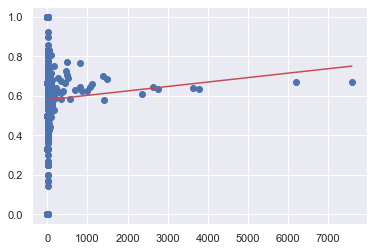

In [21]:
from scipy import stats
x=citiesdf.restaurants
y=citiesdf.percentageForeign
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

In [22]:
print(r_value, intercept, gradient, p_value)

0.029430026927217783 0.5798580875141308 2.2443400407311066e-05 0.4169221163921182


In [17]:
#80% percent of towns have 27 or less restaurants
np.percentile(citiesdf.restaurants, 80)

27.0

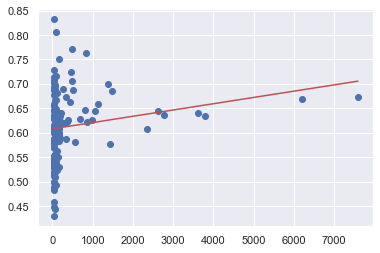

In [18]:
#let's take a look at how just large restaurant cities(cities that have >27 restaurants on yelp) would affect the data
bigCities=citiesdf[citiesdf.restaurants > 27]
x=bigCities.restaurants
y=bigCities.percentageForeign
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

In [19]:
print(r_value, intercept, gradient)

0.17880100760261367 0.6078739374634974 1.2861026257128332e-05


**Analysis**:
A lot of towns had only a singular restaurant which was making r-squared value incredibly low meaning the datapoints don't relate to the regression well. With just taking the top 20% of cities, the r-value became 17.8% which is still relatively low, but shows that it's not an irrelevant link. As a city grows, there are more foreign restaurants as a percentage of restaurants in the city indicating that there is more cultural influence and imports in larger cities. The R-value is not that high, but in a measurement of both the high population cities and all cities, the intercept is around .6 indicating that there is a high base influence from foreign cultures.

# Analyzing Cultural Influence by Racial Type

In [23]:
ethnic=restaurantdf.drop(columns=['business_id','checkin','name','city','state'])

Find relationship between named categories and the racial demographic. X=# of each demographic(white, latino, asian), Random forest
feed features( x variable ->categories)
Y=#of restaurants 


work with dummies - groupby first and sum the categories

In [24]:
#group the categories by racial demographic.
racial=['White', 'Black', 'American Indian', 'Asian', 'Pacific Islander', 'Hispanic']
categoryList=list(categories.columns)
categoryList.remove(categoryList[0])

In [25]:
#bucket the categories of restaurants by race as defined from US census bureau
#I would love to 
categoriesByRace={racial[0]: ['American (New)','American (Traditional)','Armenian', 'Australian', 'Austrian', 'Basque', 'Belgian', 'British', 'Canadian (New)', 'Creperies', 'Donairs', 'Falafel', 'French', 'Gelato', 'German','Greek', 'Hungarian', 'Irish', 'Irish Pub', 'Italian', 'Macarons', 'Polish', 'Portuguese', 'Poutineries', 'Russian', 'Scottish', 'Ukrainian', 'Sicilian', 'Tuscan', 'Uzbek', 'Czech', 'Czech/Slovakian', 'Scandinavian', 'Slovakian', 'Iberian', 'Bulgarian'],
                  racial[1]: ['African','Afghan', 'Ethiopian','Kebab', 'Middle Eastern', 'Moroccan', 'Pakistani', 'Persian/Iranian', 'South African', 'Southern','Syrian', 'Trinidadian','Turkish', 'Egyptian', 'Haitian', 'Pita', 'Senegalese'],
                  racial[2]: ['Cajun/Creole', 'Caribbean'],
                  racial[3]: ['Asian Fusion', 'Bangladeshi', 'Cambodian','Chinese', 'Dim Sum', 'Himalayan/Nepalese', 'Hong Kong Style Cafe', 'Indian', 'Izakaya','Japanese','Korean', 'Laotian', 'Mongolian', 'Pan Asian', 'Ramen', 'Szechuan', 'Taiwanese','Thai', 'Vietnamese','Burmese', 'Japanese Sweets', 'Shanghainese', 'Singaporean','Teppanyaki', 'Kombucha', 'Japanese Curry', 'Udon', 'Tempura', 'Tonkatsu', 'Soba', 'Hainan'],
                  racial[4]: ['Filipino', 'Hakka', 'Hawaiian', 'Malaysian','Poke','Sri Lankan','Tiki Bars', 'Indonesian', 'Guamanian'],
                  racial[5]: ['Argentine', 'Brazilian', 'Cuban', 'Honduran', 'Latin American', 'Mexican', 'New Mexican Cuisine', 'Nicaraguan', 'Peruvian', 'Puerto Rican', 'Salvadoran', 'Tacos','Tapas Bars', 'Tex-Mex', 'Venezuelan', 'Colombian', 'Dominican', 'Empanadas', 'Oaxacan', 'Churros'],
                 }

In [26]:
restaurantdf.groupby('city').business_id.count()

city
AGINCOURT                    1
Agincourt                    1
Ahwatukee                    4
Airdrie                     67
Ajax                       158
                          ... 
solon                        1
south Euclid                 1
springdale                   1
verdun                       1
E¾EEEEe-des-Soeurs      1
Name: business_id, Length: 763, dtype: int64

In [27]:
from collections import Counter

In [28]:
def check_which_racial(row):
    racialType=[]
    for i in list(row.keys()):
        if row[i] >0:
            #if row.keys()[i] in categoriesByRace.values():
            for key in list(categoriesByRace.keys()):
                if i in categoriesByRace[key]:
                    racialType.append(key)
    if len(racialType)==0:
        return None
    return Counter(racialType).most_common(1)[0][0]

#for each row of each category, make a list where the categories are a 1 and convert those, same size as this dataframe


In [29]:
racialTypes = ethnic.apply(lambda x: check_which_racial(x),axis=1)

In [30]:
restaurantdf['racial']=racialTypes
racialTypes.value_counts()

White               17951
Asian               10730
Hispanic             4867
Black                1700
American Indian       665
Pacific Islander      468
dtype: int64

In [31]:
cityCount=restaurantdf.city.value_counts()
x=cityCount

In [32]:
#Y should be the amount of each racial type by city
y_racial={}
for key in list(categoriesByRace.keys()):
    y_racial[key]=restaurantdf[restaurantdf.racial==key].city.value_counts()


In [33]:
x_racial={}
for key in list(categoriesByRace.keys()):
    if key not in x_racial.keys():
        x_racial[key]=[]
    for city in y_racial[key].index:
        x_racial[key].append(x[city])

The predictor variable is -0.00009, the intercept is 0.57174, and the R-squared is -0.16401 for white.
The predictor variable is -0.00002, the intercept is 0.09280, and the R-squared is -0.10372 for black.
The predictor variable is -0.00002, the intercept is 0.07430, and the R-squared is -0.14278 for american indian.
The predictor variable is -0.00001, the intercept is 0.22273, and the R-squared is -0.03080 for asian.
The predictor variable is -0.00001, the intercept is 0.03100, and the R-squared is -0.12838 for pacific islander.
The predictor variable is -0.00002, the intercept is 0.15736, and the R-squared is -0.08725 for hispanic.


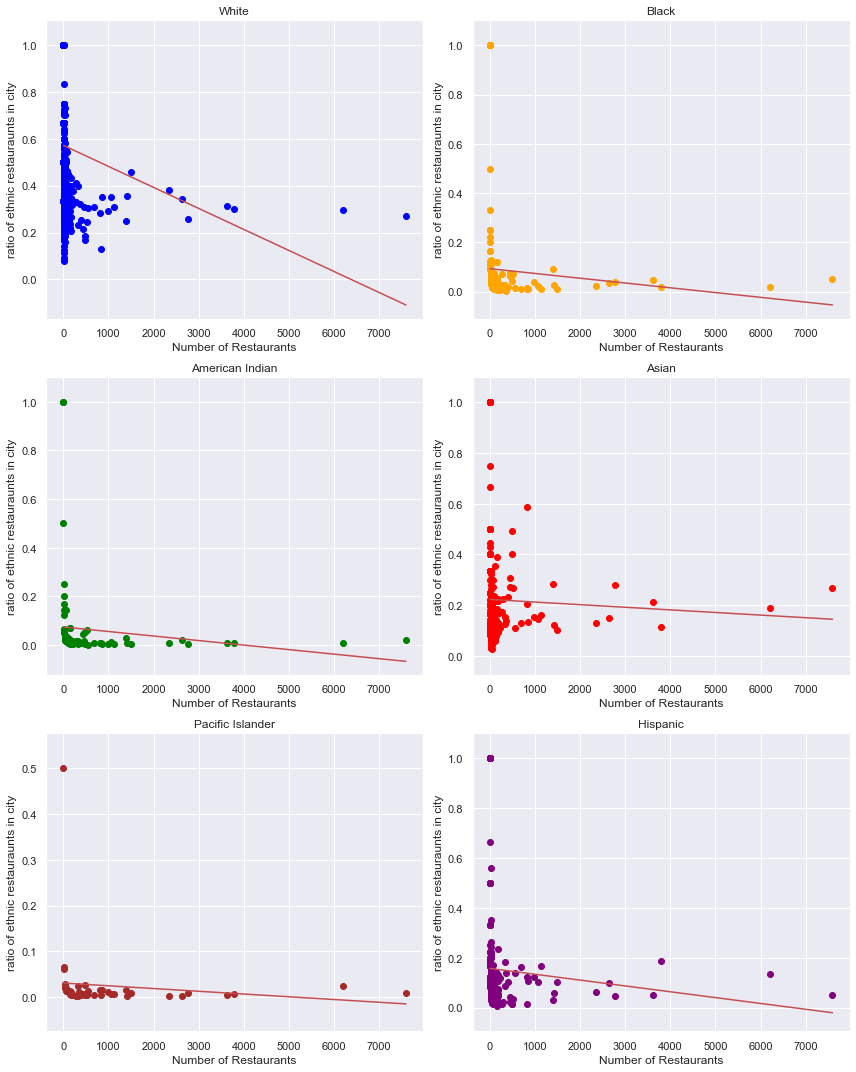

In [40]:
from scipy import stats

fig, axs = plt.subplots(3, 2)
axs[0, 0].scatter(x_racial['White'], y_racial['White']/x_racial['White'],color='blue')
axs[0, 0].set_title('White')

gradient, intercept, r_value, p_value, std_err = stats.linregress(x_racial['White'],y_racial['White']/x_racial['White'])
mn=np.min(x_racial['White'])
mx=np.max(x_racial['White'])
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
axs[0, 0].plot(x1,y1,'-r')
print("The predictor variable is {:.5f}, the intercept is {:.5f}, and the R-squared is {:.5f} for white.".format(gradient,intercept,r_value))


axs[0, 1].scatter(x_racial['Black'], y_racial['Black']/x_racial['Black'], color='orange')
axs[0, 1].set_title('Black')

gradient, intercept, r_value, p_value, std_err = stats.linregress(x_racial['Black'],y_racial['Black']/x_racial['Black'])
mn=np.min(x_racial['Black'])
mx=np.max(x_racial['Black'])
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
axs[0, 1].plot(x1,y1,'-r')
print("The predictor variable is {:.5f}, the intercept is {:.5f}, and the R-squared is {:.5f} for black.".format(gradient,intercept,r_value))


axs[1, 0].scatter(x_racial['American Indian'], y_racial['American Indian']/x_racial['American Indian'], color='green')
axs[1, 0].set_title('American Indian')

gradient, intercept, r_value, p_value, std_err = stats.linregress(x_racial['American Indian'],y_racial['American Indian']/x_racial['American Indian'])
mn=np.min(x_racial['American Indian'])
mx=np.max(x_racial['American Indian'])
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
axs[1, 0].plot(x1,y1,'-r')
print("The predictor variable is {:.5f}, the intercept is {:.5f}, and the R-squared is {:.5f} for american indian.".format(gradient,intercept,r_value))


axs[1, 1].scatter(x_racial['Asian'], y_racial['Asian']/x_racial['Asian'], color='red')
axs[1, 1].set_title('Asian')

gradient, intercept, r_value, p_value, std_err = stats.linregress(x_racial['Asian'],y_racial['Asian']/x_racial['Asian'])
mn=np.min(x_racial['Asian'])
mx=np.max(x_racial['Asian'])
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
axs[1, 1].plot(x1,y1,'-r')
print("The predictor variable is {:.5f}, the intercept is {:.5f}, and the R-squared is {:.5f} for asian.".format(gradient,intercept,r_value))


axs[2, 0].scatter(x_racial['Pacific Islander'], y_racial['Pacific Islander']/x_racial['Pacific Islander'], color='brown')
axs[2, 0].set_title('Pacific Islander')

gradient, intercept, r_value, p_value, std_err = stats.linregress(x_racial['Pacific Islander'],y_racial['Pacific Islander']/x_racial['Pacific Islander'])
mn=np.min(x_racial['Pacific Islander'])
mx=np.max(x_racial['Pacific Islander'])
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
axs[2, 0].plot(x1,y1,'-r')
print("The predictor variable is {:.5f}, the intercept is {:.5f}, and the R-squared is {:.5f} for pacific islander.".format(gradient,intercept,r_value))


axs[2, 1].scatter(x_racial['Hispanic'], y_racial['Hispanic']/x_racial['Hispanic'], color='purple')
axs[2, 1].set_title('Hispanic')

gradient, intercept, r_value, p_value, std_err = stats.linregress(x_racial['Hispanic'],y_racial['Hispanic']/x_racial['Hispanic'])
mn=np.min(x_racial['Hispanic'])
mx=np.max(x_racial['Hispanic'])
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
axs[2, 1].plot(x1,y1,'-r')
print("The predictor variable is {:.5f}, the intercept is {:.5f}, and the R-squared is {:.5f} for hispanic.".format(gradient,intercept,r_value))


for ax in axs.flat:
    ax.set(xlabel='Number of Restaurants',ylabel='ratio of ethnic restauraunts in city')

fig.set_figheight(15)
fig.set_figwidth(12)
fig.tight_layout()    

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

**Analysis**:I have split up this figure into six separate charts to show the six racial types that the US census bureau checks. These plots have the count of restaurants in the X axis and the Y axis being ratio of ethnic restaurants in that racial type compared to all restaurants in that city with each point being a city. All of these plots have a negative relationship as not all restaurants are going to be tagged, but the less negative the R in the regression is the higher cultural influence that racial category exerts.

# Cultural Influence Over Time

In [51]:
from datetime import datetime

In [52]:
date_range=pd.date_range('2010-01', '2019-01')
date_checkin=pd.DataFrame(index=date_range,columns=categoriesByRace.keys())
#wait, how do I split by city
# date_checkin.loc['2010-01-04'].White
# date_checkin.loc['2010-01-04']
date_checkin=date_checkin.fillna(0)

In [54]:
#checkin=restaurantdf.iloc[:,0:4]
#checkin['racial']=restaurantdf.racial
checkin=restaurantdf[['checkin','city','racial']]
checkin

,checkin,city,racial
0,"[2010-07-05 16:56:31, 2010-12-21 20:30:01, 201...",Mississauga,Asian
1,"[2010-11-13 01:00:36, 2010-12-19 00:49:15, 201...",Charlotte,Asian
2,"[2010-07-20 22:03:12, 2010-07-26 19:51:14, 201...",Phoenix,Hispanic
3,"[2010-09-26 23:14:40, 2010-09-27 01:36:58, 201...",Mentor-on-the-Lake,White
4,"[2010-03-05 03:54:37, 2010-07-15 03:43:42, 201...",Las Vegas,White
...,...,...,...
56607,"[2014-05-14 18:04:07, 2014-06-23 14:58:40, 201...",Brampton,Asian
56608,"[2016-04-18 01:45:13, 2016-04-18 16:13:30, 201...",Toronto,Asian
56609,"[2010-08-21 19:44:39, 2010-08-22 23:48:43, 201...",Fairlawn,White
56610,"[2012-11-26 17:32:46, 2014-08-26 23:59:43, 201...",MontrE¾EE½©al,Asian


In [30]:
#checkin.checkin.apply(lambda x: x.date())
#can't apply since it is a list of datetimes not each one being a date time

for i, row in checkin.iterrows():
    row_date=pd.to_datetime(row.checkin)
#     row_date=[]
#     for date in row.checkin:
#         row_date.append(datetime.strptime(date, '%Y-%m-%d %H:%M:%S').date())
#     print(row_date)
    for date in list(row_date.date):
            date_checkin.loc[date][row.racial]+=1

In [55]:
def add_to_timeseries(data,timeseries):
    for i, row in data.iterrows():
        row_date=pd.to_datetime(row.checkin)
        for date in list(row_date.date):
            try:
                timeseries.loc[date][row.racial]+=1
            except:
                pass

In [56]:
#Chunk dataframe into one that's smaller
n = 5000  #chunk row size
checkin_chunk_df = [checkin[i:i+n] for i in range(0,checkin.shape[0],n)]

In [57]:
for chunk_index,chunk in enumerate(checkin_chunk_df):
    add_to_timeseries(checkin_chunk_df[chunk_index],date_checkin)

In [58]:
#Export to CSV so I don't have to always keep manipulating the JSON to get the dataframe
date_checkin.to_csv('yelp_dataset/date_checkin.csv',index=None,header=True, encoding="utf-8-sig") 

In [59]:
monthly_checkin = date_checkin.resample('M').sum()
monthly_checkin

,White,Black,American Indian,Asian,Pacific Islander,Hispanic
2010-01-31,777,19,13,249,3,153
2010-02-28,1531,58,39,550,18,337
2010-03-31,2485,103,42,872,32,571
2010-04-30,2779,79,40,927,44,558
2010-05-31,3077,82,55,984,57,633
...,...,...,...,...,...,...
2018-09-30,38205,1487,667,23915,1415,10470
2018-10-31,35044,1419,675,22527,1329,9896
2018-11-30,16857,698,304,10807,602,4769
2018-12-31,0,0,0,0,0,0


In [60]:
monthly_checkin.index

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31',
               ...
               '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
               '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31', '2019-01-31'],
              dtype='datetime64[ns]', length=109, freq='M')

Text(0, 0.5, 'Checkins')

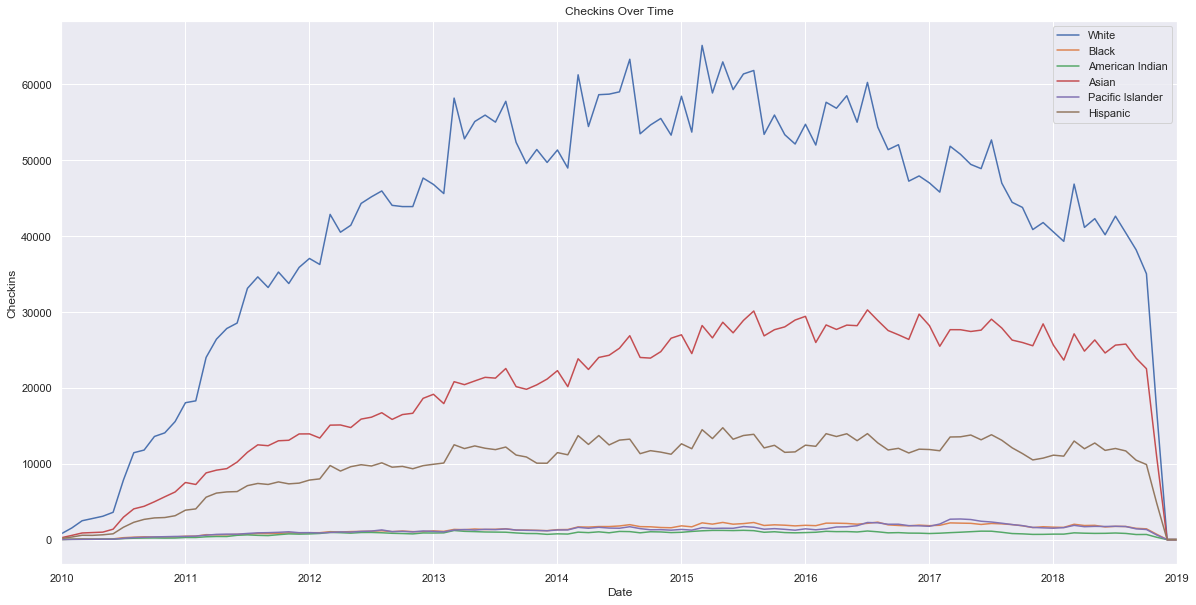

In [61]:
_=monthly_checkin.plot(figsize=(20, 10), title='Checkins Over Time')
_.set_xlabel("Date")
_.set_ylabel("Checkins")

**Analysis:**
    From the dataset, all of the racial categories kept gaining checkins to 2013 and 2014 where they plateaued. The dataset is composed of checkins from restaurants throughout Canada and the USA, the racial types are those that are defined by the US census beareau. The US census bureau does not check for ethnicity(Greek, Cambodian, Mexican, ect.) but racial types(White, black, Asian, ect.) so restaurants of different ethnicities were bucketed into the coresponding racial type. Checkins to a "white" restaurant is the effect of domestic culture as the dataset is from US and Canada with a predominantly white population.
   
   From 2010 to mid 2013 checkins for restaurants of all racial types rose before mainly plateauing off. This raise in checkins is likely due to Yelp's growth as a platform as it grows for all racial types of restaurants in this period. Less people went to restaurants that are coded to white ethnicities in the middle of 2015 yet the amount of restaurant goers to asian, hispanic, and other restaurant types stayed relatively constant. Though white restaurants lost restaurant goers overall, the other restaurant types did not absorb the loss in cultural sway. This indicates that the cultural influence of foreign cultures is relatively stable, but domestic influence is lowering.